In [34]:
!pip install tensorflow --upgrade

# **Import Modules**

In [35]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# **Load The Data**

In [36]:
TRAIN_DIR = '/kaggle/input/face-expression-recognition-dataset/images/train'

emotion_classes = [d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))]

print(f'Emotion Classes:', emotion_classes)


Emotion Classes: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [37]:
# emotion_classes = []

# for d in os.listdir(TRAIN_DIR):
#     full_path = os.path.join(TRAIN_DIR, d)
#     if os.path.isdir(full_path):
#         emotion_classes.append(d)

# /kaggle/input/face-expression-recognition-dataset/images/train + /happy

# **Data Preprocessing**

In [38]:
emotion_classes = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

# Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    #shear_range=0.0,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale = 1./255)

# Data Generators 

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/face-expression-recognition-dataset/images/train',
    target_size = (48, 48),
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle=True,
    classes=emotion_classes,
    class_mode= 'sparse'
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/face-expression-recognition-dataset/images/validation',
    target_size = (48, 48),
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle=False,
    classes=emotion_classes,
    class_mode= 'sparse'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [39]:
class_names = list(train_generator.class_indices.keys())
NUM_CLASSES = train_generator.num_classes

print("Classes:", class_names)
print("Number of classes:", NUM_CLASSES)

Classes: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Number of classes: 7


In [40]:
print(train_generator.class_indices)

{'surprise': 0, 'fear': 1, 'angry': 2, 'neutral': 3, 'sad': 4, 'disgust': 5, 'happy': 6}


# **EDA (Visualize Sample Images)**

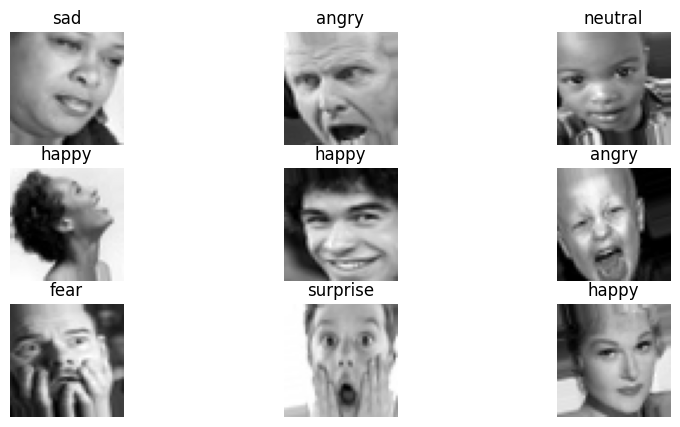

In [41]:
for images, labels in train_generators:
    plt.figure(figsize=(10, 5))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        img = images[i]
        plt.imshow(img, cmap = 'gray')

        true_index = int(labels[i])
        true_label = class_names[true_index]
        plt.title(true_label)
        plt.axis('off')
    break

plt.show()

# **Model Building**

In [42]:
# Build CNN Model 

model = Sequential([
    
    Conv2D(32, kernel_size= (3,3), activation='relu', input_shape = (48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size= (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size= (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    # Dense Layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation="softmax") 
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,015 (2.36 MB)

 Trainable params: 619,015 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(
    train_generators,
    validation_data=val_generator,
    epochs=50
)

Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.4983 - loss: 1.3191 - val_accuracy: 0.5519 - val_loss: 1.1885
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.5100 - loss: 1.2977 - val_accuracy: 0.5559 - val_loss: 1.1805
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step - accuracy: 0.5064 - loss: 1.2913 - val_accuracy: 0.5643 - val_loss: 1.1669
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.5115 - loss: 1.2764 - val_accuracy: 0.5507 - val_loss: 1.1809
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.5149 - loss: 1.2746 - val_accuracy: 0.5582 - val_loss: 1.1662
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.5200 - loss: 1.2561 - val_accuracy: 0.5713 - val_loss: 1.1687
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.5201 - loss: 1.2663 - val_accuracy: 0.5715 - val_loss: 1.1354
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.5273 - loss: 1.2370 - 

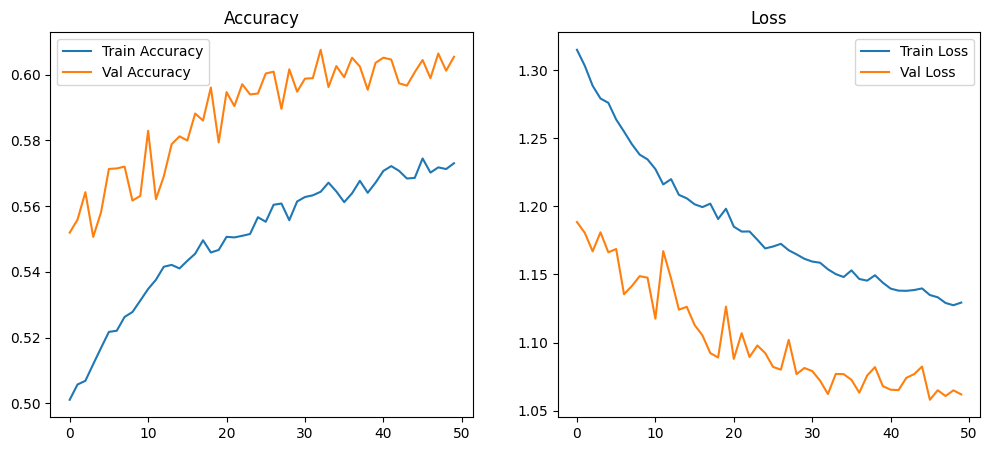

In [47]:
# Plot Accuracy & Loss

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(acc, label="Train Accuracy")
plt.plot(val_acc, label="Val Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()


# **Model Evaluation**

In [48]:
# test_loss, test_acc = cnn_model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc*100:.2f}%")


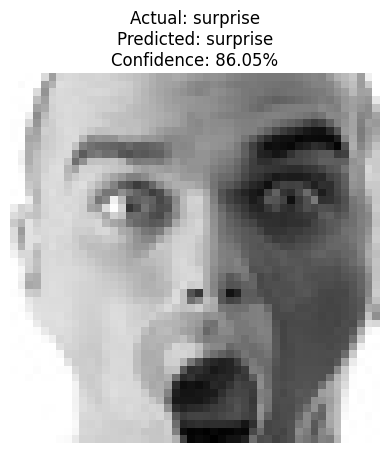

In [50]:
# Predict ONE random test image (Correct for Emotion)

for images, labels in val_generator:
    img = images[0]

    # True label (sparse)
    true_index = int(labels[0])
    true_label = class_names[true_index]

    # Prediction
    preds = model.predict(np.expand_dims(img, axis=0), verbose=0)[0]  
    # preds shape = (NUM_CLASSES,)

    pred_index = np.argmax(preds)     # ✅ correct for multi-class
    pred_label = class_names[pred_index]
    confidence = preds[pred_index] * 100

    # Show
    plt.imshow(img, cmap='gray')
    plt.title(
        f"Actual: {true_label}\n"
        f"Predicted: {pred_label}\n"
        f"Confidence: {confidence:.2f}%"
    )
    plt.axis("off")
    break


# **Multiple Predictions with Confidence (CNN + SPARSE)**

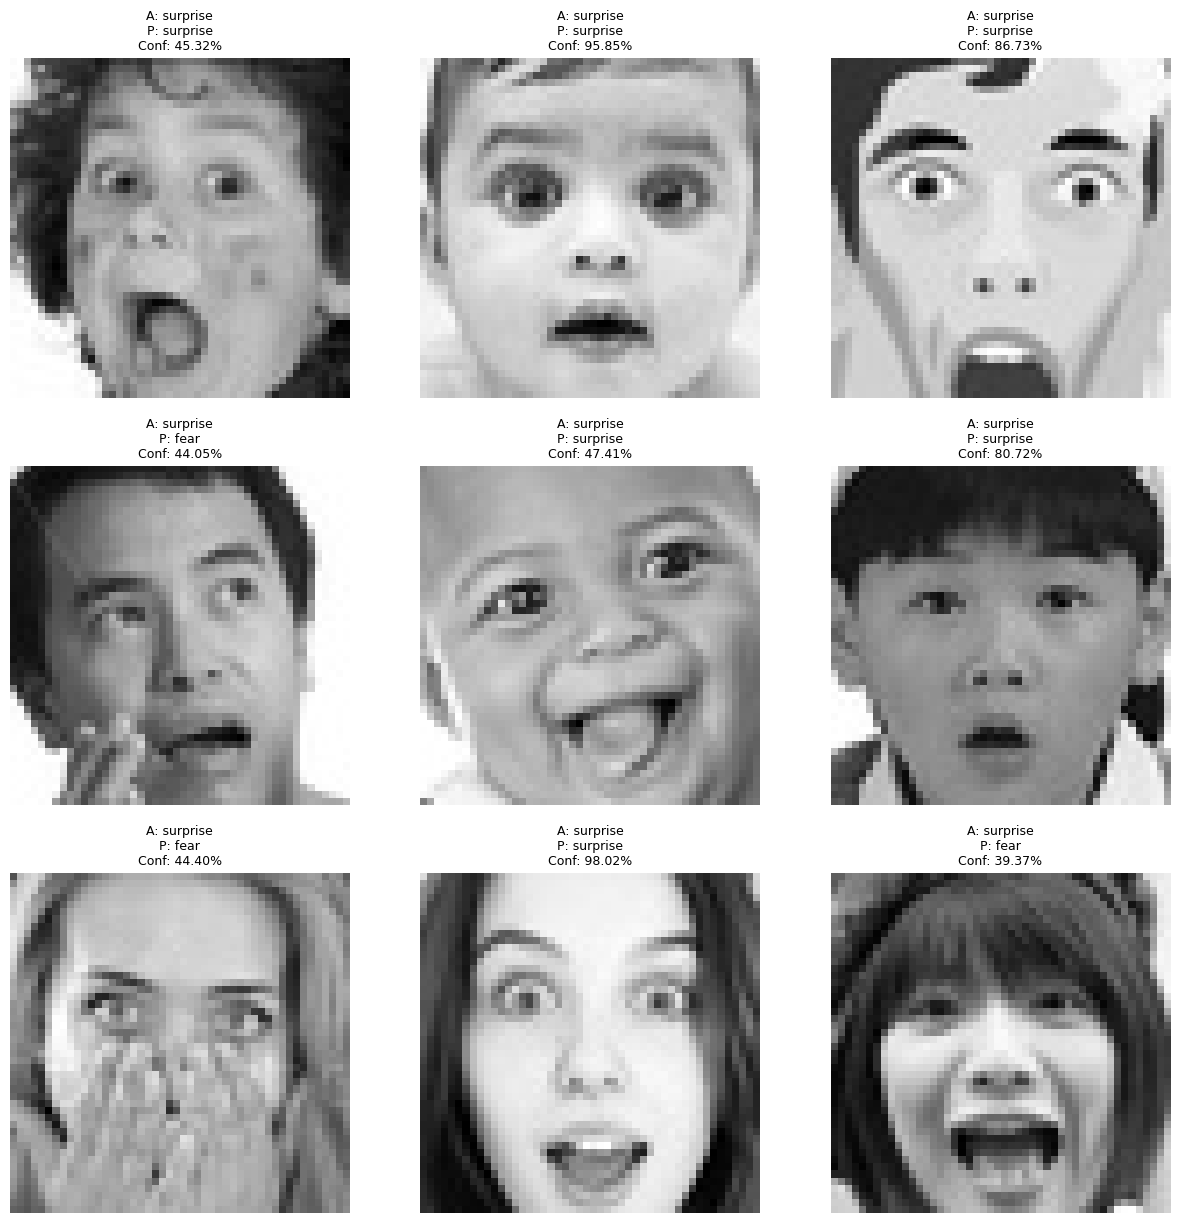

In [52]:
plt.figure(figsize=(15,15))

for images, labels in val_generator:
    for i in range(9):
        img = images[i]

        # True label (sparse)
        true_index = int(labels[i])
        true_label = class_names[true_index]

        # Prediction
        preds = model.predict(np.expand_dims(img, axis=0), verbose=0)[0]
        pred_index = np.argmax(preds)
        pred_label = class_names[pred_index]
        confidence = preds[pred_index] * 100

        # Plot
        plt.subplot(3,3,i+1)
        plt.imshow(img, cmap='gray')
        plt.title(
            f"A: {true_label}\n"
            f"P: {pred_label}\n"
            f"Conf: {confidence:.2f}%",
            fontsize=9
        )
        plt.axis("off")

    break

plt.show()


# **External Image Test (CNN + Sparse)**

In [ ]:
# Load image data using array

# from tensorflow.keras.preprocessing import image

# img_path = "/content/test_emotion.jpg"   # change path

# # Load & preprocess
# img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode="grayscale")
# #img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
# img_array = image.img_to_array(img) / 255.0  # shape (H, W, 1)
# img_array = np.expand_dims(img_array, axis=0)

# # Predict
# preds = model.predict(img_array, verbose=0)[0]

# pred_index = np.argmax(preds)
# predicted_label = class_names[pred_index]
# confidence = preds[pred_index] * 100

# # Show result
# plt.imshow(img, cmap="gray")
# plt.axis("off")
# plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
# plt.show()


In [ ]:
# **External Image Test (CNN + Sparse)** -- CV2 Method

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# img_path = "/content/test_emotion.jpg"   # change path

# # Load image in grayscale
# img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# # Resize
# img_gray = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))

# # Normalize
# img_array = img_gray.astype("float32") / 255.0

# # Add channel dimension (H, W, 1)
# img_array = np.expand_dims(img_array, axis=-1)

# # Add batch dimension (1, H, W, 1)
# img_array = np.expand_dims(img_array, axis=0)

# # Predict
# preds = cnn_model.predict(img_array, verbose=0)[0]

# pred_index = np.argmax(preds)
# predicted_label = class_names[pred_index]
# confidence = preds[pred_index] * 100

# # Show result
# plt.imshow(img_gray, cmap="gray")
# plt.axis("off")
# plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
# plt.show()

In [53]:
# model.save("emotion_cnn_sparse_model.h5")
# print("✅ CNN sparse model saved successfully!")


✅ CNN sparse model saved successfully!


In [ ]:
# WEBCAM CODE — CUSTOM CNN (GRAYSCALE, SPARSE)

# import cv2
# import numpy as np
# import tensorflow as tf

# # ==========================
# # Load Haar Cascade
# # ==========================
# face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# # ==========================
# # Load Trained CNN Model
# # ==========================
# IMG_SIZE = 48   # must match training
# MODEL_PATH = "emotion_cnn_sparse_model.h5"

# model = tf.keras.models.load_model(MODEL_PATH)
# print("✅ Grayscale CNN emotion model loaded")

# # ==========================
# # Class Names (MUST match training order)
# # ==========================
# class_names = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# # ==========================
# # Start Webcam
# # ==========================
# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert full frame to grayscale (for face detection + model)
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect faces on grayscale frame
#     faces = face_cascade.detectMultiScale(
#         gray,
#         scaleFactor=1.1,
#         minNeighbors=5,
#         minSize=(80, 80)
#     )

#     for (x, y, w, h) in faces:

#         # --------------------
#         # Crop face (grayscale)
#         # --------------------
#         face_gray = gray[y:y+h, x:x+w]

#         if face_gray.size == 0:
#             continue

#         # --------------------
#         # Preprocess for CNN
#         # --------------------
#         face_gray = cv2.resize(face_gray, (IMG_SIZE, IMG_SIZE))

#         # Normalize
#         face_array = face_gray.astype("float32") / 255.0

#         # Add channel dimension -> (H, W, 1)
#         face_array = np.expand_dims(face_array, axis=-1)

#         # Add batch dimension -> (1, H, W, 1)
#         face_array = np.expand_dims(face_array, axis=0)

#         # --------------------
#         # Predict Emotion
#         # --------------------
#         preds = model.predict(face_array, verbose=0)[0]
#         pred_index = np.argmax(preds)
#         confidence = preds[pred_index] * 100
#         label = class_names[pred_index]

#         text = f"{label} ({confidence:.2f}%)"

#         # --------------------
#         # Draw Results
#         # --------------------
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#         cv2.putText(
#             frame,
#             text,
#             (x, y - 10),
#             cv2.FONT_HERSHEY_SIMPLEX,
#             0.8,
#             (0, 255, 0),
#             2
#         )

#     cv2.imshow("Emotion Detection (CNN Grayscale)", frame)

#     # ESC to exit
#     if cv2.waitKey(1) & 0xFF == 27:
#         break

# cap.release()
# cv2.destroyAllWindows()
